# Tasca M9 T01


## Exercici 1
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.


- Se elegirá un texto que habla sobre el comportamiento social de los delfines y se calculará la frecuencia de las palabras. 
- Se importarán las librerias necesarias: NLTK consta de los algoritmos más comunes, como la tokenización, el etiquetado de partes del discurso, la derivación, el análisis de sentimientos, la segmentación de temas y el reconocimiento de entidades nombradas. NLTK ayuda a la computadora a analizar, preprocesar y comprender el texto escrito.

In [1]:
%%capture
!pip install nltk

In [2]:
# importing libraries 
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
text = """Dolphins are often regarded as one of Earth's most intelligent animals. They are social creatures,
living in pods of up to a dozen individuals. In places with a high abundance of food, pods can merge temporarily, 
forming a superpod; such groupings may exceed 1,000 dolphins. They communicate using a variety of clicks, 
whistle-like sounds and other vocalizations.
Membership in pods is not rigid; interchange is common. Dolphins can, however, establish strong social bonds; 
they will stay with injured or ill individuals, even helping them to breathe by bringing them to the surface if needed. 
This altruism does not appear to be limited to their own species. The dolphin Moko in New Zealand has been observed 
guiding a female Pygmy Sperm Whale together with her calf out of shallow water where they had stranded several times. 
They have also been seen protecting swimmers from sharks by swimming circles around the swimmers or charging the sharks 
to make them go away.
Dolphins also display culture, something long believed to be unique to humans. 
In May 2005, a discovery in Australia found Indo-Pacific bottlenose dolphins (Tursiops aduncus) teaching their young 
to use tools. They cover their snouts with sponges to protect them while foraging (looking or searching for 
food or provisions). Using sponges as mouth protection as well as other transmitted behavior proves dolphins' intelligence. 
This knowledge is mostly transferred by mothers to daughters."""

**Tokenización**

La tokenización es el primer paso en el análisis de texto. El proceso de dividir un párrafo de texto en fragmentos más pequeños, como palabras o oraciones, se denomina tokenización. El token es una entidad única que es un bloque de construcción para una oración o un párrafo.

In [4]:
tokenized_text = sent_tokenize(text)
print(tokenized_text)

["Dolphins are often regarded as one of Earth's most intelligent animals.", 'They are social creatures,\nliving in pods of up to a dozen individuals.', 'In places with a high abundance of food, pods can merge temporarily, \nforming a superpod; such groupings may exceed 1,000 dolphins.', 'They communicate using a variety of clicks, \nwhistle-like sounds and other vocalizations.', 'Membership in pods is not rigid; interchange is common.', 'Dolphins can, however, establish strong social bonds; \nthey will stay with injured or ill individuals, even helping them to breathe by bringing them to the surface if needed.', 'This altruism does not appear to be limited to their own species.', 'The dolphin Moko in New Zealand has been observed \nguiding a female Pygmy Sperm Whale together with her calf out of shallow water where they had stranded several times.', 'They have also been seen protecting swimmers from sharks by swimming circles around the swimmers or charging the sharks \nto make them go

- Se puede observar que el texto elegido es tokenizado en oraciones.



**Tokenización de palabras**

- El tokenizador de palabras divide el párrafo de texto en palabras, como podrá observarse a continuación. 

In [5]:
tokenized_word = word_tokenize(text)
print(tokenized_word)

['Dolphins', 'are', 'often', 'regarded', 'as', 'one', 'of', 'Earth', "'s", 'most', 'intelligent', 'animals', '.', 'They', 'are', 'social', 'creatures', ',', 'living', 'in', 'pods', 'of', 'up', 'to', 'a', 'dozen', 'individuals', '.', 'In', 'places', 'with', 'a', 'high', 'abundance', 'of', 'food', ',', 'pods', 'can', 'merge', 'temporarily', ',', 'forming', 'a', 'superpod', ';', 'such', 'groupings', 'may', 'exceed', '1,000', 'dolphins', '.', 'They', 'communicate', 'using', 'a', 'variety', 'of', 'clicks', ',', 'whistle-like', 'sounds', 'and', 'other', 'vocalizations', '.', 'Membership', 'in', 'pods', 'is', 'not', 'rigid', ';', 'interchange', 'is', 'common', '.', 'Dolphins', 'can', ',', 'however', ',', 'establish', 'strong', 'social', 'bonds', ';', 'they', 'will', 'stay', 'with', 'injured', 'or', 'ill', 'individuals', ',', 'even', 'helping', 'them', 'to', 'breathe', 'by', 'bringing', 'them', 'to', 'the', 'surface', 'if', 'needed', '.', 'This', 'altruism', 'does', 'not', 'appear', 'to', 'be'

**Distribución de frecuencias**

In [6]:
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 171 samples and 263 outcomes>


- Se pueden observar 171 muestras y 263 resultados. 
- También se pueden observar las palabras que más se repiten en orden descendente.

In [7]:
fdist.most_common(10)

[('.', 14),
 ('to', 11),
 (',', 9),
 ('a', 6),
 ('of', 5),
 ('as', 4),
 ('They', 4),
 ('in', 4),
 ('with', 4),
 ('or', 4)]

In [8]:
# show the same but in another format 
fdist.tabulate(10)

   .   to    ,    a   of   as They   in with   or 
  14   11    9    6    5    4    4    4    4    4 


- Se realizará un gráfico con las 30 palabras más comunes:

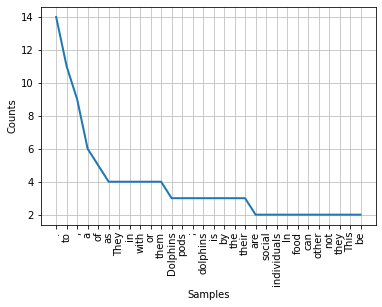

In [9]:
# Frequency Distribution Plot

fdist.plot(30, cumulative=False)
plt.show()

- En este gráfico se observa la frecuencia de palabras, es decir aquellas que más se repiten en el texto.

- Se puede observar que el texto contiene muchos signos de puntuación, por lo que se procederá a eliminarlos, conservando solo las palabras.
- También ser observan gran cantidad de stopwords. 

In [10]:
only_words_tokenized = [word for word in tokenized_word if word.isalpha()]
print(only_words_tokenized)

['Dolphins', 'are', 'often', 'regarded', 'as', 'one', 'of', 'Earth', 'most', 'intelligent', 'animals', 'They', 'are', 'social', 'creatures', 'living', 'in', 'pods', 'of', 'up', 'to', 'a', 'dozen', 'individuals', 'In', 'places', 'with', 'a', 'high', 'abundance', 'of', 'food', 'pods', 'can', 'merge', 'temporarily', 'forming', 'a', 'superpod', 'such', 'groupings', 'may', 'exceed', 'dolphins', 'They', 'communicate', 'using', 'a', 'variety', 'of', 'clicks', 'sounds', 'and', 'other', 'vocalizations', 'Membership', 'in', 'pods', 'is', 'not', 'rigid', 'interchange', 'is', 'common', 'Dolphins', 'can', 'however', 'establish', 'strong', 'social', 'bonds', 'they', 'will', 'stay', 'with', 'injured', 'or', 'ill', 'individuals', 'even', 'helping', 'them', 'to', 'breathe', 'by', 'bringing', 'them', 'to', 'the', 'surface', 'if', 'needed', 'This', 'altruism', 'does', 'not', 'appear', 'to', 'be', 'limited', 'to', 'their', 'own', 'species', 'The', 'dolphin', 'Moko', 'in', 'New', 'Zealand', 'has', 'been', 

- Se puede observar que el texto ya no contiene signos de puntuación, ni de exclamación. 

In [11]:
fdist_only_words = FreqDist(only_words_tokenized)
print(fdist_only_words)

<FreqDist with 160 samples and 227 outcomes>


- Ahora se puede observar que el texto tiene 160 muestras y 227 resultados. 

In [12]:
fdist_only_words.most_common(10)

[('to', 11),
 ('a', 6),
 ('of', 5),
 ('as', 4),
 ('They', 4),
 ('in', 4),
 ('with', 4),
 ('or', 4),
 ('them', 4),
 ('Dolphins', 3)]

In [13]:
# show the same but in another format 
fdist_only_words.tabulate(10)

      to        a       of       as     They       in     with       or     them Dolphins 
      11        6        5        4        4        4        4        4        4        3 


- Se realiza nuevamente el gráfico que muestra la frecuencia de las palabras, y las que más se repiten son stopwords. Más adelante se mostrará que hacer con ellas. 

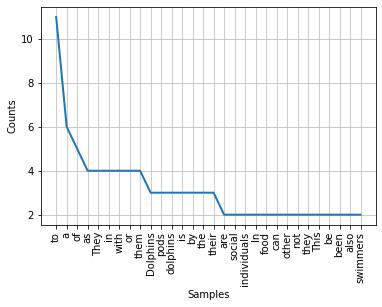

In [14]:
# Frequency Distribution Plot

fdist_only_words.plot(30, cumulative=False)
plt.show()

- En el gráfico se puede observar que ahora las palabras más repetidas son stopwords, pero si se las deja de lado, las palabras que mas se repiten son: 
- Dolphins 
- pods

In [15]:
 !pip install wordcloud

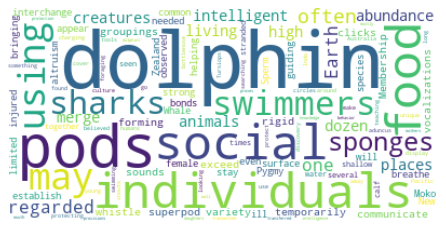

In [16]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color='white').generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

- Aquí se puede observar claramente cuales son las palabras que más se repiten. 

In [17]:
from PIL import Image

#Función para transformar todas las imágenes PNG con fondo transparente a fondo blanco

def transform_white_backgroud(png_path):
    picture = Image.open(png_path).convert("RGBA")
    image = Image.new("RGB", picture.size, "WHITE")
    image.paste(picture, (0, 0), picture)

    plt.imshow(image)
    
    mask = np.array(image)
    
    return mask


In [18]:
#directamente creamos la máscara con la imagen PNG con fondo blanco:

#image = Image.open('dolphins.png') #Aquí el path

#plt.imshow(image)
#plt.axis('off')
#mask = np.array(image)


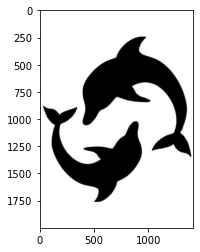

In [19]:
mask = transform_white_backgroud('dolphins.png')

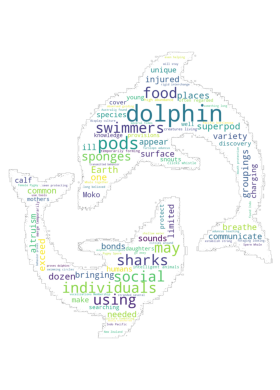

In [20]:
word_cloud = WordCloud(mask=mask, background_color='white', contour_width=1, contour_color='grey', max_words=200, min_font_size=5, collocation_threshold=10).generate(text)

word_cloud.to_file('dolphins.png') #Guardamos la imagen generada

plt.figure(figsize=(20,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()


## Exercici 2
Treu les stopwords i realitza stemming al teu conjunt de dades.


**Stopwords**

- Los stopwords son palabras vacías consideradas como ruido en el texto. El texto puede contener palabras vacías como is, am, are, this, a, an, the, etc.

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Esteban\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
# let´s look at stopwords in English
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))
print(stop_words)


{'their', 're', "wasn't", "wouldn't", 'over', 'only', 'can', 'this', 'yourselves', 'my', 'until', 'other', "she's", 'hadn', 'has', 'if', 'being', 'those', 'up', 'mustn', 'from', 'its', 'against', 'on', "haven't", 'shan', 'these', 'i', 'under', "shan't", 'ain', 'does', 'won', 'myself', 'was', 'any', 'isn', 't', "doesn't", 'once', 'so', 'herself', "couldn't", 'hers', 'be', 'same', 'are', 'a', 'ours', 'themselves', 'needn', "won't", 'here', 'where', 'as', 'aren', 'shouldn', 'having', 'she', 'yourself', 'her', 'some', 'because', 'for', 'ourselves', 'in', "you've", 'with', 'about', 'between', 'then', 'how', 'weren', "needn't", 'they', 'both', 'most', 'further', 'through', 'have', 'should', "aren't", 'hasn', "you're", 'down', "mustn't", 'now', 'or', 'himself', "hasn't", 'each', "you'd", 'yours', 'whom', 'again', 'you', 'not', 'your', 'which', 'don', 'just', 'out', 'y', 'there', 'very', 'too', 'own', "didn't", 'when', 'his', 'all', 'had', 'we', 'than', 'haven', 'but', 'do', "mightn't", 'd', '

- Se pueden observar todas las stopwords de la librería. 



- Se procederá a eliminar las stopwords del texto.

In [23]:
# we are removing all stop words
filtered_sent = []

for w in only_words_tokenized:
    if w not in stop_words:
        filtered_sent.append(w)

print("Tokenized Sentence:",tokenized_word, "\n\nFilterd Sentence:",filtered_sent)

Tokenized Sentence: ['Dolphins', 'are', 'often', 'regarded', 'as', 'one', 'of', 'Earth', "'s", 'most', 'intelligent', 'animals', '.', 'They', 'are', 'social', 'creatures', ',', 'living', 'in', 'pods', 'of', 'up', 'to', 'a', 'dozen', 'individuals', '.', 'In', 'places', 'with', 'a', 'high', 'abundance', 'of', 'food', ',', 'pods', 'can', 'merge', 'temporarily', ',', 'forming', 'a', 'superpod', ';', 'such', 'groupings', 'may', 'exceed', '1,000', 'dolphins', '.', 'They', 'communicate', 'using', 'a', 'variety', 'of', 'clicks', ',', 'whistle-like', 'sounds', 'and', 'other', 'vocalizations', '.', 'Membership', 'in', 'pods', 'is', 'not', 'rigid', ';', 'interchange', 'is', 'common', '.', 'Dolphins', 'can', ',', 'however', ',', 'establish', 'strong', 'social', 'bonds', ';', 'they', 'will', 'stay', 'with', 'injured', 'or', 'ill', 'individuals', ',', 'even', 'helping', 'them', 'to', 'breathe', 'by', 'bringing', 'them', 'to', 'the', 'surface', 'if', 'needed', '.', 'This', 'altruism', 'does', 'not', 

In [24]:
print(len(tokenized_word))
print(len(filtered_sent))

263
142


- Hay 142 palabras sin las stopwords. 

**Lexicon Normalization** 

- La normalización del léxico considera otro tipo de ruido en el texto. Por ejemplo, conexión, conectado, la palabra conexión se reduce a una palabra común "conectar". Reduce las formas derivadas de una palabra a una raíz común.


**Stemming**

- Stemming es un proceso de normalización lingüística, que reduce las palabras a su raíz o elimina los afijos derivativos. Por ejemplo, conexión, conectado, la palabra conexión se reduce a una palabra común "conectar".

In [25]:
# Stemming
from nltk.stem import PorterStemmer

ps = PorterStemmer()

stemmed_words = []
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent, "\n\nStemmed Text:",stemmed_words)

Filtered Sentence: ['Dolphins', 'often', 'regarded', 'one', 'Earth', 'intelligent', 'animals', 'They', 'social', 'creatures', 'living', 'pods', 'dozen', 'individuals', 'In', 'places', 'high', 'abundance', 'food', 'pods', 'merge', 'temporarily', 'forming', 'superpod', 'groupings', 'may', 'exceed', 'dolphins', 'They', 'communicate', 'using', 'variety', 'clicks', 'sounds', 'vocalizations', 'Membership', 'pods', 'rigid', 'interchange', 'common', 'Dolphins', 'however', 'establish', 'strong', 'social', 'bonds', 'stay', 'injured', 'ill', 'individuals', 'even', 'helping', 'breathe', 'bringing', 'surface', 'needed', 'This', 'altruism', 'appear', 'limited', 'species', 'The', 'dolphin', 'Moko', 'New', 'Zealand', 'observed', 'guiding', 'female', 'Pygmy', 'Sperm', 'Whale', 'together', 'calf', 'shallow', 'water', 'stranded', 'several', 'times', 'They', 'also', 'seen', 'protecting', 'swimmers', 'sharks', 'swimming', 'circles', 'around', 'swimmers', 'charging', 'sharks', 'make', 'go', 'away', 'Dolphin

- Se imprimió el texto sin palabras vacías junto al texto stemmed para apreciar las diferencias en las palabras.




**Lemmatization**

- La lematización reduce las palabras a su palabra base, que lema es lingüísticamente correcto. Transforma raíces de palabras con el uso de vocabulario y análisis morfológico. La lematización suele ser más sofisticada que el Stemming. Stemmer trabaja en una palabra individual sin conocimiento del contexto. Por ejemplo, la palabra "mejor" tiene "bueno" como lema. Esta palabra se perderá al derivar( stemming) porque requiere una búsqueda en el diccionario.

In [26]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Esteban\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
tokens = nltk.word_tokenize(text)
print(tokens)

['Dolphins', 'are', 'often', 'regarded', 'as', 'one', 'of', 'Earth', "'s", 'most', 'intelligent', 'animals', '.', 'They', 'are', 'social', 'creatures', ',', 'living', 'in', 'pods', 'of', 'up', 'to', 'a', 'dozen', 'individuals', '.', 'In', 'places', 'with', 'a', 'high', 'abundance', 'of', 'food', ',', 'pods', 'can', 'merge', 'temporarily', ',', 'forming', 'a', 'superpod', ';', 'such', 'groupings', 'may', 'exceed', '1,000', 'dolphins', '.', 'They', 'communicate', 'using', 'a', 'variety', 'of', 'clicks', ',', 'whistle-like', 'sounds', 'and', 'other', 'vocalizations', '.', 'Membership', 'in', 'pods', 'is', 'not', 'rigid', ';', 'interchange', 'is', 'common', '.', 'Dolphins', 'can', ',', 'however', ',', 'establish', 'strong', 'social', 'bonds', ';', 'they', 'will', 'stay', 'with', 'injured', 'or', 'ill', 'individuals', ',', 'even', 'helping', 'them', 'to', 'breathe', 'by', 'bringing', 'them', 'to', 'the', 'surface', 'if', 'needed', '.', 'This', 'altruism', 'does', 'not', 'appear', 'to', 'be'

In [28]:
#Lexicon Normalization
#performing stemming and Lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

lemma_words=[]
for w in filtered_sent:
    lemma_words.append(lem.lemmatize(w, "v"))

print("Filtered words:",filtered_sent, "\n\nLemmatized words:",lemma_words)


Filtered words: ['Dolphins', 'often', 'regarded', 'one', 'Earth', 'intelligent', 'animals', 'They', 'social', 'creatures', 'living', 'pods', 'dozen', 'individuals', 'In', 'places', 'high', 'abundance', 'food', 'pods', 'merge', 'temporarily', 'forming', 'superpod', 'groupings', 'may', 'exceed', 'dolphins', 'They', 'communicate', 'using', 'variety', 'clicks', 'sounds', 'vocalizations', 'Membership', 'pods', 'rigid', 'interchange', 'common', 'Dolphins', 'however', 'establish', 'strong', 'social', 'bonds', 'stay', 'injured', 'ill', 'individuals', 'even', 'helping', 'breathe', 'bringing', 'surface', 'needed', 'This', 'altruism', 'appear', 'limited', 'species', 'The', 'dolphin', 'Moko', 'New', 'Zealand', 'observed', 'guiding', 'female', 'Pygmy', 'Sperm', 'Whale', 'together', 'calf', 'shallow', 'water', 'stranded', 'several', 'times', 'They', 'also', 'seen', 'protecting', 'swimmers', 'sharks', 'swimming', 'circles', 'around', 'swimmers', 'charging', 'sharks', 'make', 'go', 'away', 'Dolphins',

In [29]:
print (len(filtered_sent))
print (len(lemma_words))

142
142


In [30]:
lem = WordNetLemmatizer()

lemma_words=[]
for w in stemmed_words:
    lemma_words.append(lem.lemmatize(w, 'v'))

print('Stemmed words:',stemmed_words, '\n\nLemmatized words:',lemma_words)

Stemmed words: ['dolphin', 'often', 'regard', 'one', 'earth', 'intellig', 'anim', 'they', 'social', 'creatur', 'live', 'pod', 'dozen', 'individu', 'in', 'place', 'high', 'abund', 'food', 'pod', 'merg', 'temporarili', 'form', 'superpod', 'group', 'may', 'exceed', 'dolphin', 'they', 'commun', 'use', 'varieti', 'click', 'sound', 'vocal', 'membership', 'pod', 'rigid', 'interchang', 'common', 'dolphin', 'howev', 'establish', 'strong', 'social', 'bond', 'stay', 'injur', 'ill', 'individu', 'even', 'help', 'breath', 'bring', 'surfac', 'need', 'thi', 'altruism', 'appear', 'limit', 'speci', 'the', 'dolphin', 'moko', 'new', 'zealand', 'observ', 'guid', 'femal', 'pygmi', 'sperm', 'whale', 'togeth', 'calf', 'shallow', 'water', 'strand', 'sever', 'time', 'they', 'also', 'seen', 'protect', 'swimmer', 'shark', 'swim', 'circl', 'around', 'swimmer', 'charg', 'shark', 'make', 'go', 'away', 'dolphin', 'also', 'display', 'cultur', 'someth', 'long', 'believ', 'uniqu', 'human', 'in', 'may', 'discoveri', 'aus

In [31]:
print (len(stemmed_words))
print (len(lemma_words))

142
142


- No se evidencia reducción de palabras luego de realizar "Lemmatization".

## Exercici 3
Realitza sentiment analysis al teu conjunt de dades.


Existen principalmente dos enfoques para realizar el análisis de sentimiento.

- Basado en el léxico: cuente el número de palabras positivas y negativas en un texto dado y el recuento más grande será el sentimiento del texto.

- Enfoque basado en aprendizaje automático: Desarrolle un modelo de clasificación, que se entrena utilizando el conjunto de datos preetiquetado de positivo, negativo y neutral.





- Primero, se realizará el análisis de sentimientos basado en el léxico. 

**Lexicon-based**

In [32]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Esteban\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [33]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# we use the original text
sentiment = SentimentIntensityAnalyzer()
sentiment.polarity_scores(text)

{'neg': 0.031, 'neu': 0.894, 'pos': 0.075, 'compound': 0.8612}

- Se observa un diccionario con los porcentajes de palabras negativas, neutras y positivas, y el resultado final, el compound 0.8612, nos dice que el análisis es positivo.

- La puntuación compuesta (compound) es la suma de puntuaciones positivas, negativas y neutras que luego se normaliza entre -1 (negativo más extremo) y +1 (positivo más extremo). Cuanto más se acerque la puntuación compuesta a +1, mayor será la positividad de la texto.

In [34]:
sent_dict = sentiment.polarity_scores(text)

In [35]:
def sent_score(): 
    
    if sent_dict['compound'] >= 0.05 :
        return 'Positive'
    elif sent_dict['compound'] <= - 0.05 :
        return 'Negative'
    else :
        return 'Neutral'

result = sent_score()

print('El texto general es: ', sent_dict)
print('El texto fue calificado como', sent_dict['neg']*100, '% Negative')
print('El texto fue calificado como', sent_dict['neu']*100, '% Neutral')
print('El texto fue calificado como', sent_dict['pos']*100, '% Positive')

print('El texto en general fue calificado como',result, 'con una puntuación de: ', sent_dict['compound'])


El texto general es:  {'neg': 0.031, 'neu': 0.894, 'pos': 0.075, 'compound': 0.8612}
El texto fue calificado como 3.1 % Negative
El texto fue calificado como 89.4 % Neutral
El texto fue calificado como 7.5 % Positive
El texto en general fue calificado como Positive con una puntuación de:  0.8612


In [36]:
import pandas as pd

metrics = pd.DataFrame(data=[['Dolphin',0.031, 0.894,0.075, 0.8612]],
                        columns = ['Name Text','Negavite', 'Neutral','Positive', 'Compound'])


metrics.head()


,Name Text,Negavite,Neutral,Positive,Compound
0,Dolphin,0.031,0.894,0.075,0.8612


**Sentiment Analysis on individual sentences of the text**

También se analizarán las oraciones individualmente en el texto:

In [37]:
# first we split the text into sentences 
sentences = nltk.sent_tokenize(text)
sentences

["Dolphins are often regarded as one of Earth's most intelligent animals.",
 'They are social creatures,\nliving in pods of up to a dozen individuals.',
 'In places with a high abundance of food, pods can merge temporarily, \nforming a superpod; such groupings may exceed 1,000 dolphins.',
 'They communicate using a variety of clicks, \nwhistle-like sounds and other vocalizations.',
 'Membership in pods is not rigid; interchange is common.',
 'Dolphins can, however, establish strong social bonds; \nthey will stay with injured or ill individuals, even helping them to breathe by bringing them to the surface if needed.',
 'This altruism does not appear to be limited to their own species.',
 'The dolphin Moko in New Zealand has been observed \nguiding a female Pygmy Sperm Whale together with her calf out of shallow water where they had stranded several times.',
 'They have also been seen protecting swimmers from sharks by swimming circles around the swimmers or charging the sharks \nto make

In [38]:
df = pd.DataFrame(tokenized_text, columns=['Sentences'])
df

,Sentences
0,Dolphins are often regarded as one of Earth's ...
1,"They are social creatures,\nliving in pods of ..."
2,"In places with a high abundance of food, pods ..."
3,"They communicate using a variety of clicks, \n..."
4,Membership in pods is not rigid; interchange i...
5,"Dolphins can, however, establish strong social..."
6,This altruism does not appear to be limited to...
7,The dolphin Moko in New Zealand has been obser...
8,They have also been seen protecting swimmers f...
9,"Dolphins also display culture, something long ..."


- Se observa que el texto tiene 14 frases. 

In [39]:
sentiments = SentimentIntensityAnalyzer()

df = pd.DataFrame(tokenized_text, columns=['Sentence'])
df['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in df['Sentence']]
df['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in df['Sentence']]
df['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in df['Sentence']]
df['Compound'] = [sentiments.polarity_scores(i)['compound'] for i in df['Sentence']]
display(df)



,Sentence,Positive,Negative,Neutral,Compound
0,Dolphins are often regarded as one of Earth's ...,0.248,0.000,0.752,0.5095
1,"They are social creatures,\nliving in pods of ...",0.000,0.000,1.000,0.0000
2,"In places with a high abundance of food, pods ...",0.000,0.000,1.000,0.0000
3,"They communicate using a variety of clicks, \n...",0.000,0.000,1.000,0.0000
4,Membership in pods is not rigid; interchange i...,0.146,0.000,0.854,0.0951
5,"Dolphins can, however, establish strong social...",0.157,0.157,0.686,-0.0000
6,This altruism does not appear to be limited to...,0.000,0.147,0.853,-0.2263
7,The dolphin Moko in New Zealand has been obser...,0.000,0.000,1.000,0.0000
8,They have also been seen protecting swimmers f...,0.000,0.000,1.000,0.0000
9,"Dolphins also display culture, something long ...",0.000,0.000,1.000,0.0000


- Se pueden observar las calificaciones de cada frase del texto.

In [40]:
score = df['Compound'].values
sentiment = []
for i in score:
    if i >= 0.05:
        sentiment.append('Positive')
    elif i <= -0.05:
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
        
df['Sentiment'] = sentiment
df.filter(['Sentence','Sentiment'])


,Sentence,Sentiment
0,Dolphins are often regarded as one of Earth's ...,Positive
1,"They are social creatures,\nliving in pods of ...",Neutral
2,"In places with a high abundance of food, pods ...",Neutral
3,"They communicate using a variety of clicks, \n...",Neutral
4,Membership in pods is not rigid; interchange i...,Positive
5,"Dolphins can, however, establish strong social...",Neutral
6,This altruism does not appear to be limited to...,Negative
7,The dolphin Moko in New Zealand has been obser...,Neutral
8,They have also been seen protecting swimmers f...,Neutral
9,"Dolphins also display culture, something long ...",Neutral


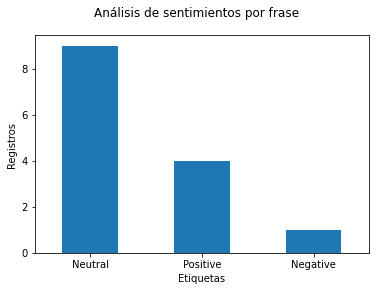

In [41]:
df['Sentiment'].value_counts().plot(kind='bar')
plt.suptitle('Análisis de sentimientos por frase')
plt.xlabel('Etiquetas')
plt.ylabel('Registros')
plt.xticks(rotation=0)
plt.show()
plt.close()


Se puede observar que el texto fue etiquetado en algunas frases de manera incorrecta, como ser: 

- Frase N°5: "La Membership in pods is not rigid; interchange is common". Esta frase fue calificada como positiva, debiendo ser correctamente etiquetada como neutral. 
- Frase N°6: "Dolphins can, however, establish strong social bonds; they will stay with injured or ill individuals, even helping them to breathe by bringing them to the surface if needed". Esta frase fue calificada como neutral, debiendo ser correctamente etiquetada como positiva. 
- Frase N°7: "This altruism does not appear to be limited to their own species". Esta frase fue calificada como negativa, debiendo ser correctamente etiquetada como neutral. 
- Frase N°8: "The dolphin Moko in New Zealand has been observed guiding a female Pygmy Sperm Whale together with her calf out of shallow water where they had stranded several times". Esta frase fue calificada como neutral, debiendo ser correctamente etiquetada como positiva. 
- Frase N°9: "They have also been seen protecting swimmers from sharks by swimming circles around the swimmers or charging the sharks to make them go away". Esta frase fue calificada como neutral, debiendo ser correctamente etiquetada como positiva. 
- Frase N°10: "Dolphins also display culture, something long believed to be unique to humans". Esta frase fue calificada como neutral, debiendo ser correctamente etiquetada como positiva. 
- Frase N°11: "In May 2005, a discovery in Australia found Indo-Pacific bottlenose dolphins (Tursiops aduncus) teaching their young to use tools". Esta frase fue calificada como neutral, debiendo ser correctamente etiquetada como positiva. 
- Frase N°12: "They cover their snouts with sponges to protect them while foraging (looking or searching for food or provisions)". Esta frase fue calificada como positiva, debiendo ser correctamente etiquetada como neutral. 
- Las demás frases fueron correctamente etiquetadas. 

- Se corregirán las celdas para graficar los valores reales

In [42]:
df.at[4,'Sentiment'] = 'Neutral'
df.at[5,'Sentiment'] = 'Positive'
df.at[6,'Sentiment'] = 'Neutral'
df.at[7,'Sentiment'] = 'Positive'
df.at[8,'Sentiment'] = 'Positive'
df.at[9,'Sentiment'] = 'Positive'
df.at[10,'Sentiment'] = 'Positive'
df.at[11,'Sentiment'] = 'Neutral'


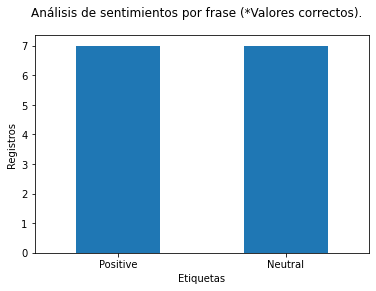

In [43]:
df['Sentiment'].value_counts().plot(kind='bar')
plt.suptitle('Análisis de sentimientos por frase (*Valores correctos).')
plt.xlabel('Etiquetas')
plt.ylabel('Registros')
plt.xticks(rotation=0)
plt.show()
plt.close()

- Se realizará el cálculo de polaridad y subjetividad

In [44]:
!pip install -U textblob

In [45]:
from textblob import TextBlob
sent = TextBlob(text)
print(sent.sentiment)


Sentiment(polarity=0.11211826052735145, subjectivity=0.4600334513970878)


- La polaridad es una métrica utilizada para estimar el sentimiento general de un texto y varía de -1 a 1, donde -1 sería completamente negativo, 0 es neutral y 1 es completamente positivo. En este caso, está muy cerca de 0, por lo que el sentimiento general es neutral.

- La subjetividad es una métrica que va de 0 a 1, donde 0 es muy objetivo y 1 es muy subjetivo. En este caso, cae casi en el medio. Por lo que se entiende, cuenta partes de la trama, que son objetivas.


- Se realizará la clasificación del texto basado en aprendizaje automático. 

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sentence   14 non-null     object 
 1   Positive   14 non-null     float64
 2   Negative   14 non-null     float64
 3   Neutral    14 non-null     float64
 4   Compound   14 non-null     float64
 5   Sentiment  14 non-null     object 
dtypes: float64(4), object(2)
memory usage: 800.0+ bytes


In [47]:
df.Sentiment.value_counts()

Positive    7
Neutral     7
Name: Sentiment, dtype: int64

**Generación de features usando Bolsa de palabras (Bag of Words)**

Para realizar la clasificación usando machine learning se debe convertir el texto en números o vectores de números.

- El modelo de bolsa de palabras (BoW) es la forma más sencilla de extraer características del texto. BoW convierte el texto en la matriz de aparición de palabras dentro de un documento. Este modelo se refiere a si las palabras dadas ocurrieron o no en el documento.

- Luego creará una matriz de documentos y palabras contando la ocurrencia de palabras en el documento dado. Esta matriz se conoce como Matriz de Término-Documento (DTM).

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df['Sentence'])

**Split train and test set**

- Para comprender el rendimiento del modelo, dividir el conjunto de datos en un conjunto de entrenamiento (train) y un conjunto de prueba (test) es una buena estrategia.

- Se dividirá el conjunto de datos usando la función train_test_split().

In [60]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df['Sentiment'], test_size=0.3, random_state=1)

**Construcción y evaluación de modelos**

In [61]:
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [62]:
classifiers = {
    "BernoulliNB": BernoulliNB(),
    "ComplementNB": ComplementNB(),
    "MultinomialNB": MultinomialNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "MLPClassifier": MLPClassifier(max_iter=1000),
    "AdaBoostClassifier": AdaBoostClassifier(),
}

In [63]:
for name, sklearn_classifier in classifiers.items():
    clf = sklearn_classifier.fit(X_train, y_train)
    predicted= clf.predict(X_test)
    print(name, "- Accuracy:",metrics.accuracy_score(y_test, predicted))
    


BernoulliNB - Accuracy: 0.8
ComplementNB - Accuracy: 0.6
MultinomialNB - Accuracy: 0.6
KNeighborsClassifier - Accuracy: 0.6
DecisionTreeClassifier - Accuracy: 0.6
RandomForestClassifier - Accuracy: 0.6
LogisticRegression - Accuracy: 0.8
MLPClassifier - Accuracy: 0.6
AdaBoostClassifier - Accuracy: 0.6


- Se puede observar que en algunos modelos se obtuvo un accuracy aceptable (0.8) y en otros la tasa de clasificación fue del 0.6, la cual no se considera una buena precisión. 





**Feature Generation using TF-IDF\**

- TF-IDF (frecuencia de término-frecuencia de documento inversa) normaliza la matriz de términos del documento. Es el producto de TF y IDF. En Term Frequency (TF), solo cuenta la cantidad de palabras que se produjeron en cada documento. El problema principal con esta frecuencia de término es que le dará más peso a los documentos más largos. La frecuencia de término es básicamente el resultado del modelo BoW.

- IDF (frecuencia inversa del documento) mide la cantidad de información que proporciona una palabra determinada en todo el documento. IDF es la relación inversa escalada logarítmicamente del número de documentos que contienen la palabra y el número total de documentos.

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(df['Sentence'])

**Split train and test set (TF-IDF)**

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, df['Sentiment'], test_size=0.3, random_state=1)

**Construcción y evaluación de modelos (TF-IDF)**
- fuente [https://realpython.com/python-nltk-sentiment-analysis/]

In [66]:
classifiers_tf = {
    "BernoulliNB": BernoulliNB(),
    "ComplementNB": ComplementNB(),
    "MultinomialNB": MultinomialNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "MLPClassifier": MLPClassifier(max_iter=1000),
    "AdaBoostClassifier": AdaBoostClassifier(),
}

In [67]:
for name, sklearn_classifier in classifiers_tf.items():
    clf = sklearn_classifier.fit(X_train, y_train)
    predicted= clf.predict(X_test)
    print(name, "- Accuracy:",metrics.accuracy_score(y_test, predicted))


BernoulliNB - Accuracy: 0.6
ComplementNB - Accuracy: 0.6
MultinomialNB - Accuracy: 0.6
KNeighborsClassifier - Accuracy: 0.4
DecisionTreeClassifier - Accuracy: 0.6
RandomForestClassifier - Accuracy: 0.4
LogisticRegression - Accuracy: 0.4
MLPClassifier - Accuracy: 0.4
AdaBoostClassifier - Accuracy: 0.6


In [69]:
metrics = pd.DataFrame(data=[['BernoulliNB', '0,8', '0,6'],
                            ['ComplementNB', '0,6', '0,6'],
                            ['MultinomialNB', '0,6', '0,6'],
                            ['KNeighborsClassifier', '0,6', '0,4'],
                            ['DecisionTreeClassifier', '0,6', '0,6'],
                            ['RandomForestClassifier', '0,6', '0,4'],
                            ['LogisticRegression', '0,8', '0,4'],
                            ['MLPClassifier', '0,6', '0,4'],
                            ['AdaBoostClassifier', '0,6', '0,6']],
                        columns = ['Modelo','Acurracy', 'Acurracy con TF-IDF'])
metrics

,Modelo,Acurracy,Acurracy con TF-IDF
0,BernoulliNB,"0,8","0,6"
1,ComplementNB,"0,6","0,6"
2,MultinomialNB,"0,6","0,6"
3,KNeighborsClassifier,"0,6","0,4"
4,DecisionTreeClassifier,"0,6","0,6"
5,RandomForestClassifier,"0,6","0,4"
6,LogisticRegression,"0,8","0,4"
7,MLPClassifier,"0,6","0,4"
8,AdaBoostClassifier,"0,6","0,6"


- Se puede observar que el accuracy con TF-IDF en los modelos: "BernoulliNB", "KNeighborsClassifier", "RandomForestClassifier	", "LogisticRegression" y "MLPClassifier", disminuyó. En el resto de los modelos se mantuvo igual.